In [9]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='2y', interval='1wk')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-26 00:00:00+09:00,26585.380859,26680.199219,25805.589844,25937.210938,349900000,0.0,0.0
2022-10-03 00:00:00+09:00,25778.949219,27399.189453,25621.960938,27116.109375,377200000,0.0,0.0
2022-10-10 00:00:00+09:00,26757.119141,27180.160156,26237.419922,27090.759766,289300000,0.0,0.0
2022-10-17 00:00:00+09:00,26785.019531,27371.380859,26649.130859,26890.580078,305600000,0.0,0.0
2022-10-24 00:00:00+09:00,27233.000000,27578.050781,26974.900391,27105.199219,392300000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-26 00:00:00+09:00,38156.410156,38669.789062,37825.308594,38647.750000,507800000,0.0,0.0
2024-09-02 00:00:00+09:00,39025.308594,39080.640625,36235.609375,36391.468750,545700000,0.0,0.0
2024-09-09 00:00:00+09:00,35805.820312,36902.210938,35247.871094,36581.761719,600300000,0.0,0.0


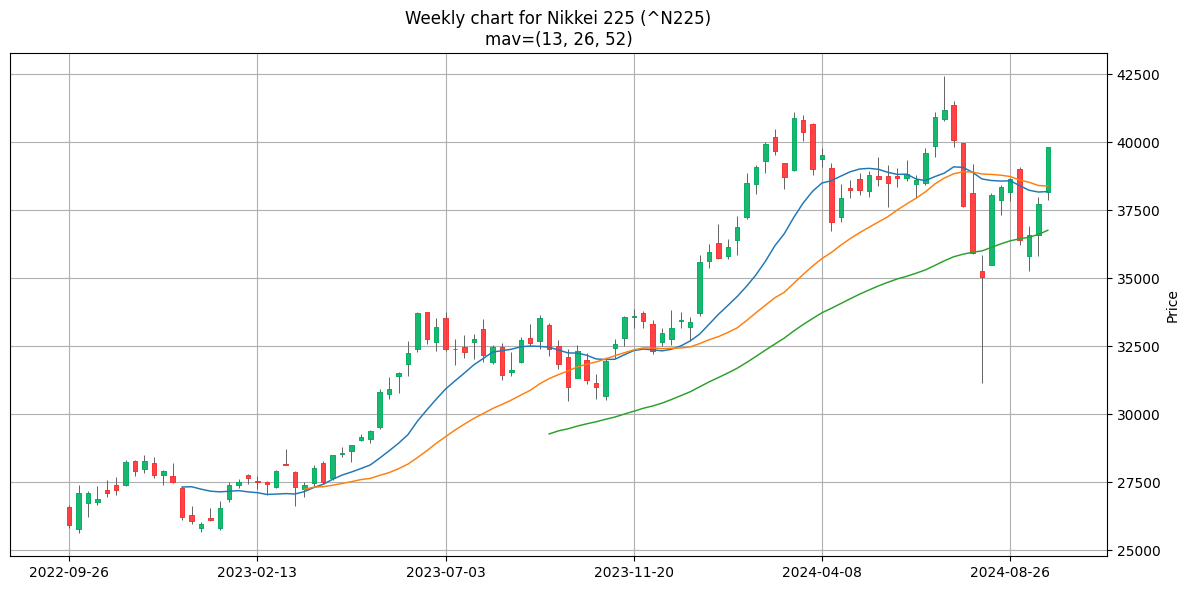

In [10]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='yahoo',
    mav=(13, 26, 52),
    volume=False,
    datetime_format='%Y-%m-%d',
    xrotation=0,
    ax=ax,
)
ax.set_title('Weekly chart for %s (%s)\nmav=(13, 26, 52)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('weekly_chart_n225.png')
plt.show()

In [11]:
df.tail(2)['Close']

Date
2024-09-16 00:00:00+09:00    37723.910156
2024-09-23 00:00:00+09:00    39829.558594
Name: Close, dtype: float64

In [12]:
df.tail(2)['Close'].diff()

Date
2024-09-16 00:00:00+09:00            NaN
2024-09-23 00:00:00+09:00    2105.648438
Name: Close, dtype: float64

In [13]:
df['Close'].rolling(26).mean()

Date
2022-09-26 00:00:00+09:00             NaN
2022-10-03 00:00:00+09:00             NaN
2022-10-10 00:00:00+09:00             NaN
2022-10-17 00:00:00+09:00             NaN
2022-10-24 00:00:00+09:00             NaN
                                 ...     
2024-08-26 00:00:00+09:00    38733.901442
2024-09-02 00:00:00+09:00    38607.075571
2024-09-09 00:00:00+09:00    38525.310998
2024-09-16 00:00:00+09:00    38403.598708
2024-09-23 00:00:00+09:00    38382.833984
Name: Close, Length: 105, dtype: float64

In [14]:
df['Close'].rolling(52).mean()

Date
2022-09-26 00:00:00+09:00             NaN
2022-10-03 00:00:00+09:00             NaN
2022-10-10 00:00:00+09:00             NaN
2022-10-17 00:00:00+09:00             NaN
2022-10-24 00:00:00+09:00             NaN
                                 ...     
2024-08-26 00:00:00+09:00    36371.846755
2024-09-02 00:00:00+09:00    36444.628080
2024-09-09 00:00:00+09:00    36503.256385
2024-09-16 00:00:00+09:00    36605.592924
2024-09-23 00:00:00+09:00    36758.899452
Name: Close, Length: 105, dtype: float64